In [1]:
import scipy.io.wavfile
import scipy.signal
import numpy as np
import heartpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import os

C:\Users\user\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [23]:
for k in range(1,101):
    data_url = 'D:/Data/ECGDB/' + str(k)
    save_url = "D:/Data/ECGDB_preprocessing/01. down_sampling/" + str(k)
#     os.mkdir(save_url)
    
    for i in range(1,61):
    
        file = pd.read_csv(data_url + "/{0}.csv".format(i), header=None)
        ECG_down = pd.DataFrame([file[1][j] for j in range(1,500000,195)])
        ECG_down.to_csv(save_url + "/down_sampling_{0}.csv".format(i))

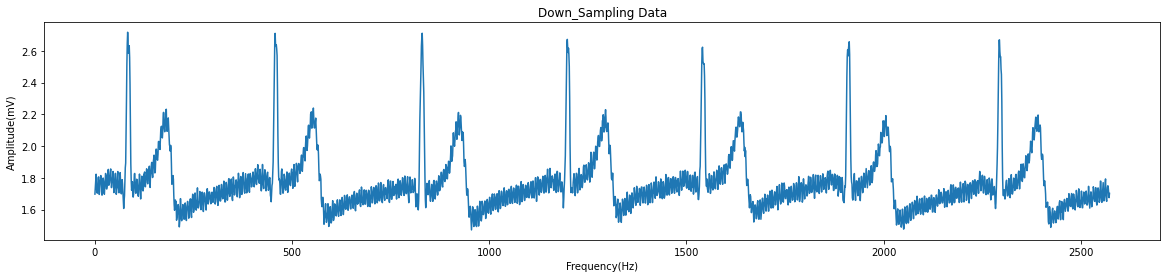

In [26]:
ECG = pd.read_csv('D:/Data/ECGDB_preprocessing/02. down_sampling/1/down_sampling_1.csv')
ECG_r = pd.read_csv('D:/Data/ECGDB/1/1.csv')

ECG.transpose()
plt.figure(figsize=(20,4))
plt.title("Down_Sampling Data")
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
# plt.xticks(x)
plt.plot(ECG.iloc[:,1]) #신호

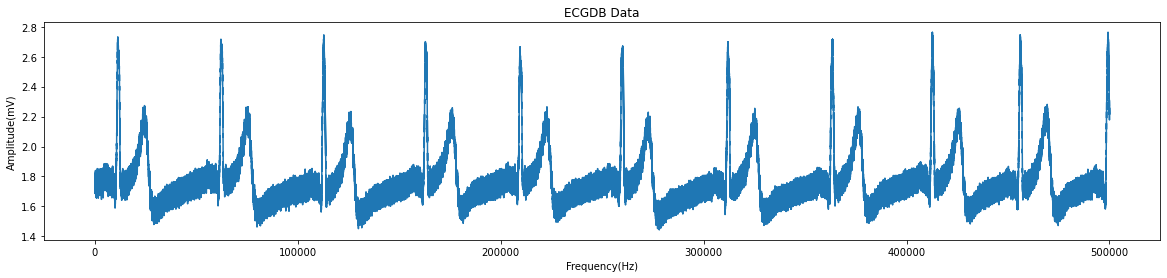

In [27]:
plt.figure(figsize=(20,4))
plt.title("ECGDB Data")
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
plt.plot(ECG_r.iloc[:,1]) #신호

In [10]:
for k in range(56,101):
    data_url = 'D:/Data/ECGDB/down_sampling/' + str(k)
    save_url = "D:/Data/ECGDB/Band_pass/" + str(k)
    os.mkdir(save_url)
    
    for i in range(1,61):

        file = (data_url + "/down_sampling_{0}.csv".format(i))

        ECG_bp = pd.read_csv(file, header=0)
        ECG_bpp = ECG_bp.transpose()
        # ECG = hp.scale_data(ECG)

        test = []

    #     for j in range(0,60):

        ECG_1= ECG_bpp.iloc[1]

        ECG_bandpass = hp.filter_signal(ECG_1, cutoff=[0.01, 50], sample_rate=500.0, order=3, filtertype='bandpass')


    #     plt.subplot(4, 1, 1)
    #     plt.title("origial data_{0}".format(i))
    #     plt.plot(ECG_bp.iloc[1])


    #     plt.subplot(4, 1, 3)
    #     plt.title("band_{0}".format(i))
    #     plt.plot(ECG_bandpass)


        plt.show()


#         print(file)

        test.append(ECG_bandpass)

        test = pd.DataFrame(test).transpose()
        pd.DataFrame(test).to_csv(save_url + "/ECG_bandpass_{0}.csv".format(i))
    
        
#     plt.savefig('D:/Data/ECGDB/ECG_bandpass/ECG_band_{0}.jpg'.format(i))

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'D:/Data/ECGDB/Band_pass/56'

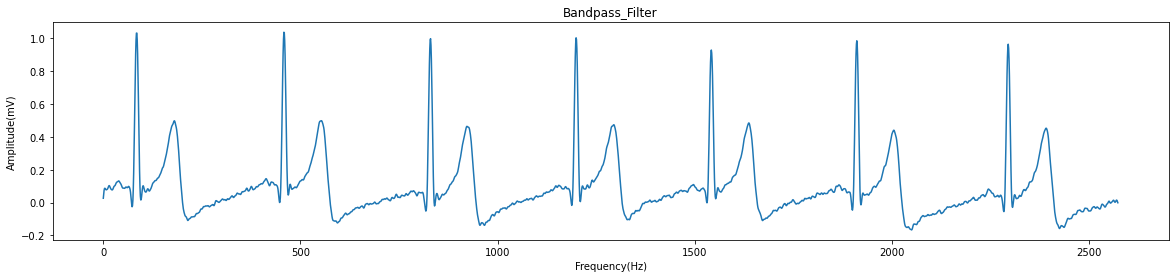

In [28]:
ECG_band_pass= pd.read_csv('D:/Data/ECGDB_preprocessing/03. Band_pass/1/ECG_bandpass_1.csv')
ECG_band_pass = ECG_band_pass.transpose()
plt.figure(figsize=(20,4))
plt.title("Bandpass_Filter")
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(mV)')
plt.plot(ECG_band_pass.iloc[1])

In [62]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ECG = pd.read_csv('D:/Data/ECGDB_preprocessing/03. Band_pass/10/ECG_bandpass_28.csv')

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig

#low-pass filter
def lpf(x):
	y = x.copy()
	
	for n in x.index:
		if(n < 12):
			continue
		y.iloc[n,1] = 2*y.iloc[n-1,1] - y.iloc[n-2,1] + x.iloc[n,1] - 2*x.iloc[n-6,1] + x.iloc[n-12,1] 
	return y

In [64]:
#high-pass filter
def hpf(x):
	y = x.copy()
	
	for n in x.index:
		if(n < 32):
			continue
		y.iloc[n,1] = y.iloc[n-1,1] - x.iloc[n,1]/32 + x.iloc[n-16,1] - x.iloc[n-17,1] + x.iloc[n-32,1]/32
	return y

In [65]:
#defivative of signal
def deriv(x):
    y = x.copy()
    
    for n in x.index:
        if(n < 4):
            continue
        y.iloc[n, 1] = (2*x.iloc[n,1] + x.iloc[n-1,1] - x.iloc[n-3,1] - 2*x.iloc[n-4,1])/4
    return y

In [66]:
#squarring the signal
def squaring(x):
	y = x.copy()

	for n in x.index:
		y.iloc[n,1] = x.iloc[n,1]**2
	return y

In [67]:
#integral of the signal for a moving window of ws size.
def win_sum(x, ws):
	y = x.copy()
	l = int(ws/2)
	
	for n in x.index:
		tmp_sum = 0
		
		if(n > 933-l):
			break

		if(n < l):
			continue
		for j in range(n-l,n+l+1):
			tmp_sum += x.iloc[j,1]
		y.iloc[n,1] = tmp_sum/(l+1)		
	return y

def detection(x):
	y = x.copy()

In [90]:
#Application of lpf
f1 = lpf(ECG)
#Application of hpf
f2 = hpf(f1)
#Application of the derivative
f3 = deriv(f2)
#squaring signal
f4 = squaring(f3)

window_size = 40
f5 = win_sum(f4, window_size)

Text(0, 0.5, 'mV')

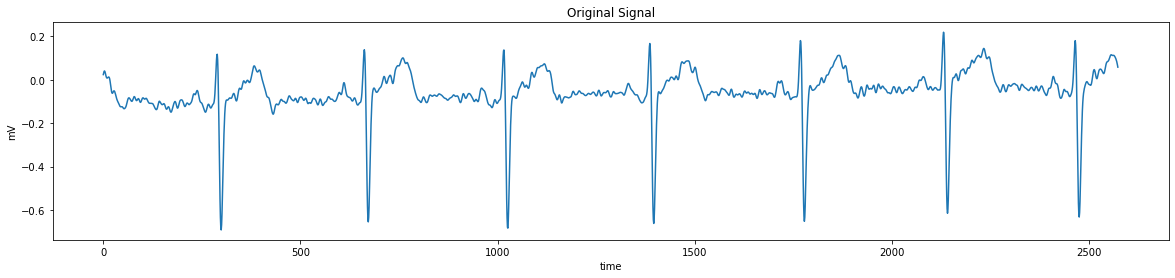

In [69]:
plt.figure(figsize=(20,4))
plt.plot(ECG.iloc[:,1])
plt.title('Original Signal')
plt.xlabel('time')
# plt.xlim([-5, 5]) 
plt.ylabel('mV')

[]

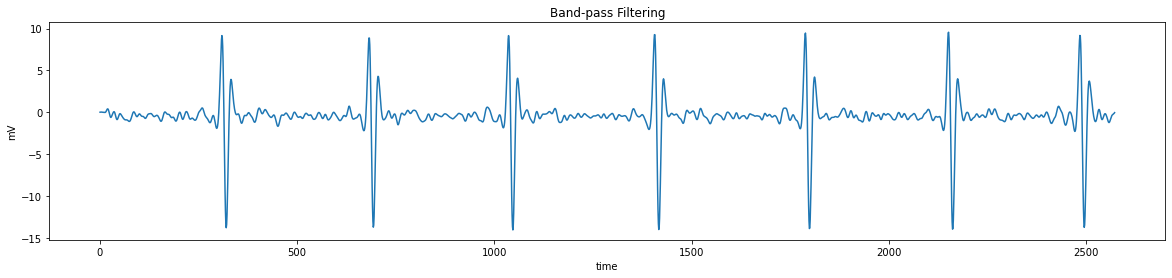

In [70]:
plt.figure(figsize=(20,4))
plt.plot(f2.iloc[:,0], f2.iloc[:,1])
plt.title('Band-pass Filtering')
plt.xlabel('time')
plt.ylabel('mV')
plt.plot()

In [71]:
# from systole.detectors import pan_tompkins, hamilton, moving_average, christov, engelse_zeelenberg
# # Load NeuroKit and other useful packages
# import neurokit2 as nk

# file = f2

# pantompkins1985 = nk.ecg_findpeaks(nk.ecg_clean(f2.iloc[:,1], method="pantompkins1985"), method="pantompkins1985")
# signals, info = nk.ecg_peaks(f2.iloc[:,1], correct_artifacts=False)
# nk.events_plot(info["ECG_R_Peaks"], f2.iloc[:,1])
        
# #         peak = pd.DataFrame(pantompkins1985)
        
# print(pantompkins1985)

# peak = pd.DataFrame(pantompkins1985)
# peak.to_csv(save_url + "/r_peak_{0}.csv".format(i))

Text(0, 0.5, 'mV')

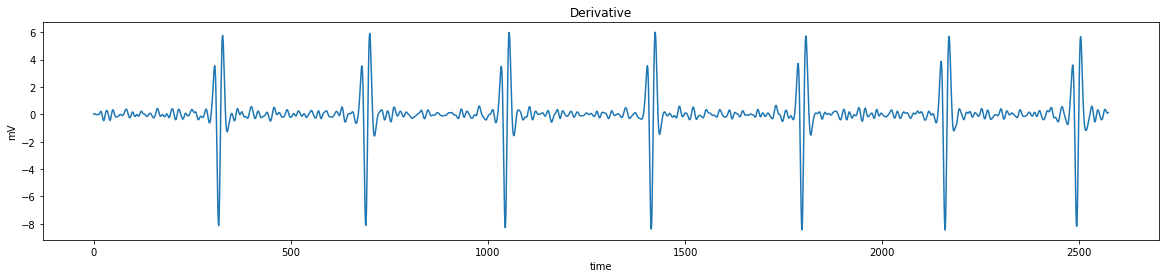

In [72]:
plt.figure(figsize=(20,4))
plt.plot(f3.iloc[:,0], f3.iloc[:,1])
plt.title('Derivative')
plt.xlabel('time')
plt.ylabel('mV')

Text(0, 0.5, 'mV')

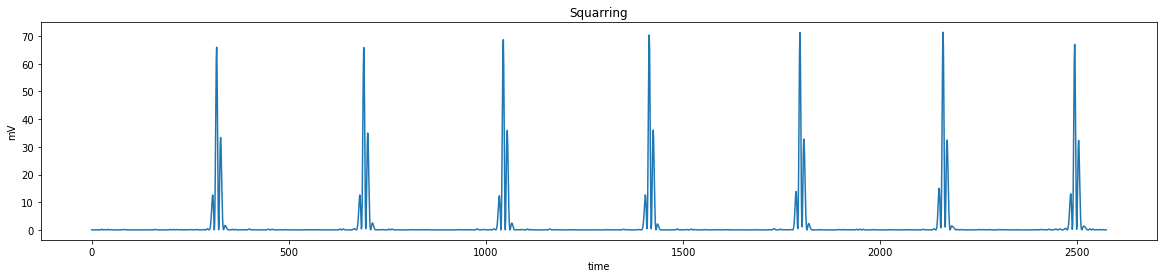

In [73]:
plt.figure(figsize=(20,4))
plt.plot(f4.iloc[:,0], f4.iloc[:,1])
plt.title('Squarring')
plt.xlabel('time')
plt.ylabel('mV')

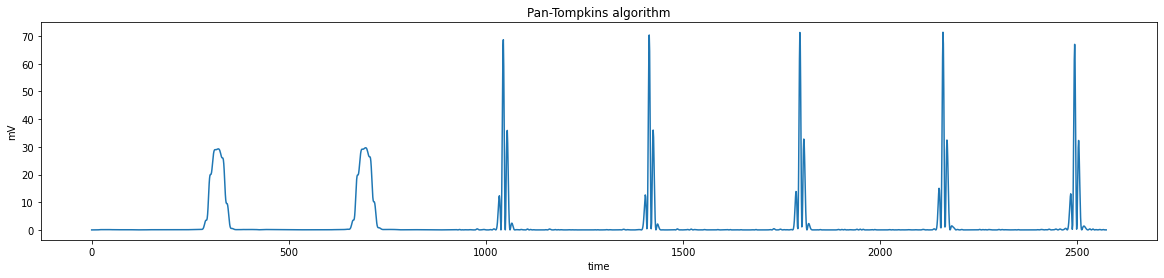

In [91]:
plt.figure(figsize=(20,4))
plt.plot(f5.iloc[:,1])
plt.title('Pan-Tompkins algorithm')
plt.xlabel('time')
plt.ylabel('mV')
plt.show()

[]

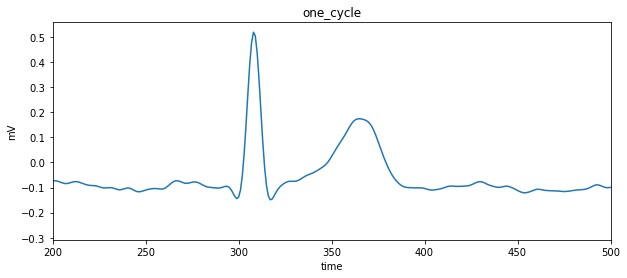

In [15]:
plt.figure(figsize=(10,4))
plt.plot(ECG.iloc[:,1])
plt.title('one_cycle')
plt.xlabel('time')
plt.xlim([200 , 500])
plt.ylabel('mV')
plt.plot()


In [16]:
from systole.detectors import pan_tompkins, hamilton, moving_average, christov, engelse_zeelenberg
# Load NeuroKit and other useful packages
import neurokit2 as nk

In [86]:
ECG1 = pd.read_csv('D:/Data/ECGDB_preprocessing/03. Band_pass/10/ECG_bandpass_28.csv')

<Figure size 1440x288 with 0 Axes>

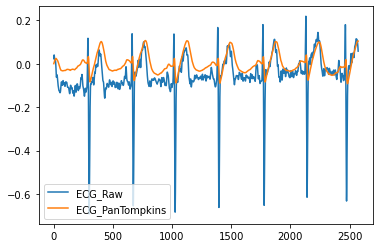

<Figure size 1440x288 with 0 Axes>

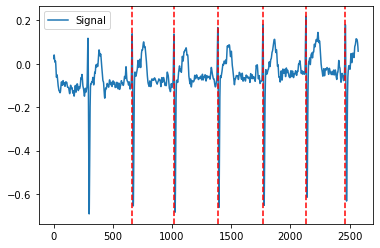

In [89]:
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt

ecg = nk.ecg_simulate(duration=1, sampling_rate=256)
signals = pd.DataFrame({"ECG_Raw" : ECG.iloc[:,1],"ECG_PanTompkins" : nk.ecg_clean(ECG.iloc[:,1], sampling_rate=2565, method="pantompkins1985"),})
plt.figure(figsize=(20,4))
signals.plot() 

# nk.ecg_findpeaks(ecg, sampling_rate=2565, method="promac", show=True)
# plt.plot(ECG, modality='ecg', ecg_method='pan-tompkins', backend='bokeh', show_heart_rate=True)

# cleaned = nk.ecg_clean(f2.iloc[:,1], sampling_rate=2565)
#  _, rpeaks = nk.ecg_peaks(f5.iloc[:,1], sampling_rate=2565)
# signals, waves = nk.ecg_delineate(f5.iloc[:,1], rpeaks, sampling_rate=2565)
# nk.events_plot(waves["ECG_P_Peaks"], f5.iloc[:,1]) 
# nk.events_plot(waves["ECG_T_Peaks"], f5.iloc[:,1])


pantompkins1985 = nk.ecg_findpeaks(nk.ecg_clean(ECG.iloc[:,1], method="pantompkins1985"), method="pantompkins1985")

signals, info = nk.ecg_peaks(ECG.iloc[:,1], correct_artifacts=False)
plt.figure(figsize=(20,4))
nk.events_plot(info["ECG_R_Peaks"], ECG.iloc[:,1]) 


In [27]:
print(pantompkins1985)

{'ECG_R_Peaks': array([ 375,  798, 1247, 1679, 1985, 2455])}


[]

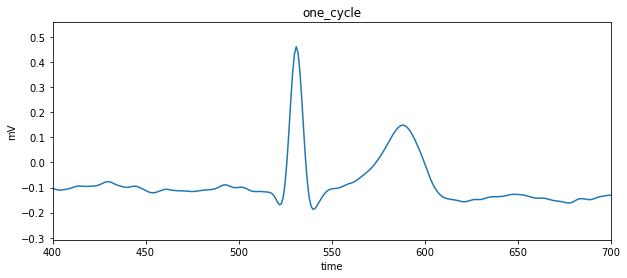

In [33]:
plt.figure(figsize=(10,4))
plt.plot(ECG.iloc[:,1])
plt.title('one_cycle')
plt.xlabel('time')
plt.xlim([400 , 700])
plt.ylabel('mV')
plt.plot()

In [71]:
for k in range(1,101):
    data_url = 'D:/Data/ECGDB/Band_pass/' + str(k)
    save_url = "D:/Data/ECGDB/R_peak/" + str(k)
    os.mkdir(save_url)
    
    for i in range(1,61):

        file = (data_url + "/ECG_bandpass_{0}.csv".format(i))

        ECG_bp = pd.read_csv(file, header=0)
#         ECG_bpp = ECG_bp.transpose()
        # ECG = hp.scale_data(ECG)

        test = []
        
        ecg = nk.ecg_simulate(duration=1, sampling_rate=2572)
        signals = pd.DataFrame({"ECG_Raw" : ECG_bp.iloc[:,1],"ECG_PanTompkins" : nk.ecg_clean(ECG_bp.iloc[:,1], sampling_rate=2565, method="pantompkins1985"),})
#         signals.plot() 


        pantompkins1985 = nk.ecg_findpeaks(nk.ecg_clean(ECG_bp.iloc[:,1], method="pantompkins1985"), method="pantompkins1985")

        signals, info = nk.ecg_peaks(ECG_bp.iloc[:,1], correct_artifacts=False)
#         nk.events_plot(info["ECG_R_Peaks"], ECG_bp.iloc[:,1]) 


        plt.show()


#         print(file)

        test.append(pantompkins1985)

#         test = pd.DataFrame(test).transpose()
        pd.DataFrame(test).to_csv(save_url + "/r_peak_{0}.csv".format(i))
        print(file)
        print(test)
        np.savetxt("r_peak.txt", test, fmt='%s', delimiter=',')
        
#     plt.savefig('D:/Data/ECGDB/ECG_bandpass/ECG_band_{0}.jpg'.format(i))

D:/Data/ECGDB/Band_pass/1/ECG_bandpass_1.csv
[{'ECG_R_Peaks': array([ 353,  681, 1078, 1432, 1897, 2218])}]
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_2.csv
[{'ECG_R_Peaks': array([ 307,  686, 1004, 1408, 1755, 2249])}]
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_3.csv
[{'ECG_R_Peaks': array([ 306,  613,  960, 1439, 1763, 2066, 2371])}]
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_4.csv
[{'ECG_R_Peaks': array([ 318,  643, 1125, 1519, 1829, 2244])}]
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_5.csv
[{'ECG_R_Peaks': array([ 348,  668,  978, 1409, 1711, 2018, 2498])}]
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_6.csv
[{'ECG_R_Peaks': array([ 313,  645, 1032, 1378, 1820, 2138])}]
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_7.csv
[{'ECG_R_Peaks': array([ 301,  681, 1032, 1474, 1800, 2257])}]
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_8.csv
[{'ECG_R_Peaks': array([ 314,  669,  970, 1424, 1788, 2261])}]
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_9.csv
[{'ECG_R_Peaks': array([ 327,  723, 1038, 1496, 1807, 2118])}]
D:/Data/ECGDB/Ba

D:/Data/ECGDB/Band_pass/2/ECG_bandpass_20.csv
[{'ECG_R_Peaks': array([ 337,  662,  963, 1274, 1582, 2057, 2450])}]
D:/Data/ECGDB/Band_pass/2/ECG_bandpass_21.csv
[{'ECG_R_Peaks': array([ 351,  680, 1155, 1491, 1819, 2120])}]
D:/Data/ECGDB/Band_pass/2/ECG_bandpass_22.csv
[{'ECG_R_Peaks': array([ 302,  646,  975, 1283, 1774, 2131, 2459])}]
D:/Data/ECGDB/Band_pass/2/ECG_bandpass_23.csv
[{'ECG_R_Peaks': array([ 302,  610, 1093, 1438, 1773, 2074, 2383])}]
D:/Data/ECGDB/Band_pass/2/ECG_bandpass_24.csv
[{'ECG_R_Peaks': array([ 389,  736, 1063, 1368, 1843, 2181, 2487])}]
D:/Data/ECGDB/Band_pass/2/ECG_bandpass_25.csv
[{'ECG_R_Peaks': array([ 308,  682, 1010, 1339, 1778, 2141, 2451])}]
D:/Data/ECGDB/Band_pass/2/ECG_bandpass_26.csv
[{'ECG_R_Peaks': array([ 307,  620,  925, 1234, 1671, 1990, 2320])}]
D:/Data/ECGDB/Band_pass/2/ECG_bandpass_27.csv
[{'ECG_R_Peaks': array([ 320,  753, 1085, 1392, 1700, 2222, 2528])}]
D:/Data/ECGDB/Band_pass/2/ECG_bandpass_28.csv
[{'ECG_R_Peaks': array([ 316,  621, 1064

D:/Data/ECGDB/Band_pass/3/ECG_bandpass_40.csv
[{'ECG_R_Peaks': array([ 401,  715, 1141, 1444, 1860, 2162, 2558])}]
D:/Data/ECGDB/Band_pass/3/ECG_bandpass_41.csv
[{'ECG_R_Peaks': array([ 331,  746, 1175, 1559, 1872, 2222])}]
D:/Data/ECGDB/Band_pass/3/ECG_bandpass_42.csv
[{'ECG_R_Peaks': array([ 330,  744, 1052, 1411, 1829, 2258])}]
D:/Data/ECGDB/Band_pass/3/ECG_bandpass_43.csv
[{'ECG_R_Peaks': array([ 326,  742, 1044, 1385, 1699, 2096, 2464])}]
D:/Data/ECGDB/Band_pass/3/ECG_bandpass_44.csv
[{'ECG_R_Peaks': array([ 330,  637,  951, 1260, 1570, 1883, 2214, 2521])}]
D:/Data/ECGDB/Band_pass/3/ECG_bandpass_45.csv
[{'ECG_R_Peaks': array([ 385,  791, 1093, 1461, 1773, 2107, 2419])}]
D:/Data/ECGDB/Band_pass/3/ECG_bandpass_46.csv
[{'ECG_R_Peaks': array([ 322,  729, 1203, 1607, 2058, 2492])}]
D:/Data/ECGDB/Band_pass/3/ECG_bandpass_47.csv
[{'ECG_R_Peaks': array([ 307,  701, 1007, 1354, 1668, 2056, 2359])}]
D:/Data/ECGDB/Band_pass/3/ECG_bandpass_48.csv
[{'ECG_R_Peaks': array([ 340,  641, 1015, 1465

D:/Data/ECGDB/Band_pass/4/ECG_bandpass_57.csv
[{'ECG_R_Peaks': array([ 309,  636,  937, 1258, 1580, 1884, 2199, 2550])}]
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_58.csv
[{'ECG_R_Peaks': array([ 334,  635,  941, 1287, 1643, 1951, 2259, 2561])}]
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_59.csv
[{'ECG_R_Peaks': array([ 313,  641,  942, 1266, 1583, 1911, 2303])}]
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_60.csv
[{'ECG_R_Peaks': array([ 349,  660,  988, 1327, 1712, 2020, 2348])}]
D:/Data/ECGDB/Band_pass/5/ECG_bandpass_1.csv
[{'ECG_R_Peaks': array([ 306,  612, 1002, 1314, 1758, 2069, 2488])}]
D:/Data/ECGDB/Band_pass/5/ECG_bandpass_2.csv
[{'ECG_R_Peaks': array([ 402,  729, 1128, 1457, 1875, 2178])}]
D:/Data/ECGDB/Band_pass/5/ECG_bandpass_3.csv
[{'ECG_R_Peaks': array([ 346,  671, 1029, 1331, 1633, 1962, 2333])}]
D:/Data/ECGDB/Band_pass/5/ECG_bandpass_4.csv
[{'ECG_R_Peaks': array([ 357,  667, 1003, 1418, 1835, 2245])}]
D:/Data/ECGDB/Band_pass/5/ECG_bandpass_5.csv
[{'ECG_R_Peaks': array([ 382,  689, 100

D:/Data/ECGDB/Band_pass/6/ECG_bandpass_15.csv
[{'ECG_R_Peaks': array([ 302,  629,  939, 1308, 1625, 1967, 2377])}]
D:/Data/ECGDB/Band_pass/6/ECG_bandpass_16.csv
[{'ECG_R_Peaks': array([ 315,  641,  948, 1278, 1586, 1986, 2289])}]
D:/Data/ECGDB/Band_pass/6/ECG_bandpass_17.csv
[{'ECG_R_Peaks': array([ 320,  707, 1012, 1371, 1681, 2042, 2348])}]
D:/Data/ECGDB/Band_pass/6/ECG_bandpass_18.csv
[{'ECG_R_Peaks': array([ 316,  626,  949, 1325, 1636, 2056, 2376])}]
D:/Data/ECGDB/Band_pass/6/ECG_bandpass_19.csv
[{'ECG_R_Peaks': array([ 302,  615,  982, 1293, 1672, 1986, 2363])}]
D:/Data/ECGDB/Band_pass/6/ECG_bandpass_20.csv
[{'ECG_R_Peaks': array([ 322,  743, 1049, 1419, 1729, 2157, 2514])}]
D:/Data/ECGDB/Band_pass/6/ECG_bandpass_21.csv
[{'ECG_R_Peaks': array([ 345,  653,  978, 1291, 1632, 1937, 2267])}]
D:/Data/ECGDB/Band_pass/6/ECG_bandpass_22.csv
[{'ECG_R_Peaks': array([ 312,  730, 1077, 1469, 1782, 2144, 2465])}]
D:/Data/ECGDB/Band_pass/6/ECG_bandpass_23.csv
[{'ECG_R_Peaks': array([ 303,  627

D:/Data/ECGDB/Band_pass/7/ECG_bandpass_30.csv
[{'ECG_R_Peaks': array([ 305,  703, 1081, 1467, 1867, 2174, 2503])}]
D:/Data/ECGDB/Band_pass/7/ECG_bandpass_31.csv
[{'ECG_R_Peaks': array([ 331,  644,  946, 1253, 1629, 1996, 2382])}]
D:/Data/ECGDB/Band_pass/7/ECG_bandpass_32.csv
[{'ECG_R_Peaks': array([ 305,  615,  917, 1224, 1525, 1845, 2166, 2539])}]
D:/Data/ECGDB/Band_pass/7/ECG_bandpass_33.csv
[{'ECG_R_Peaks': array([ 307,  608,  909, 1280, 1593, 1905, 2276])}]
D:/Data/ECGDB/Band_pass/7/ECG_bandpass_34.csv
[{'ECG_R_Peaks': array([ 311,  647,  985, 1373, 1767, 2133, 2490])}]
D:/Data/ECGDB/Band_pass/7/ECG_bandpass_35.csv
[{'ECG_R_Peaks': array([ 312,  640,  958, 1259, 1582, 1911, 2294])}]
D:/Data/ECGDB/Band_pass/7/ECG_bandpass_36.csv
[{'ECG_R_Peaks': array([ 311,  684,  989, 1324, 1639, 1946, 2279])}]
D:/Data/ECGDB/Band_pass/7/ECG_bandpass_37.csv
[{'ECG_R_Peaks': array([ 364,  675,  999, 1323, 1718, 2025, 2356])}]
D:/Data/ECGDB/Band_pass/7/ECG_bandpass_38.csv
[{'ECG_R_Peaks': array([ 312

IndexError: index 0 is out of bounds for axis 0 with size 0

In [117]:
for k in range(1,6):
    data_url = 'D:/Data/ECGDB/Band_pass/' + str(k)
    save_url = "D:/Data/ECGDB/one_cycle/" + str(k)
#     os.mkdir(save_url)
    
    for i in range(1,61):

        file = (data_url + "/ECG_bandpass_{0}.csv".format(i))
        ECG_oc = pd.read_csv(file, header=0)

        test = []

        ECG_occ= ECG_oc.iloc[:,1]
        ECG_one_cycle = ECG_occ.loc[300:600]

        test.append(ECG_one_cycle)
        pd.DataFrame(test).to_csv(save_url + "/one_cycle_{0}.csv".format(i))
        
        print(file)
        plt.show(test)

D:/Data/ECGDB/Band_pass/1/ECG_bandpass_1.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_2.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_3.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_4.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_5.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_6.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_7.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_8.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_9.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_10.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_11.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_12.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_13.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_14.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_15.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_16.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_17.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_18.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_19.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_20.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_21.csv
D:/Data/ECGDB/Band_pass/1/ECG_bandpass_22.c

D:/Data/ECGDB/Band_pass/4/ECG_bandpass_12.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_13.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_14.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_15.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_16.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_17.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_18.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_19.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_20.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_21.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_22.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_23.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_24.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_25.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_26.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_27.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_28.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_29.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_30.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_31.csv
D:/Data/ECGDB/Band_pass/4/ECG_bandpass_32.csv
D:/Data/ECGDB/Band_pass/4/ECG_band

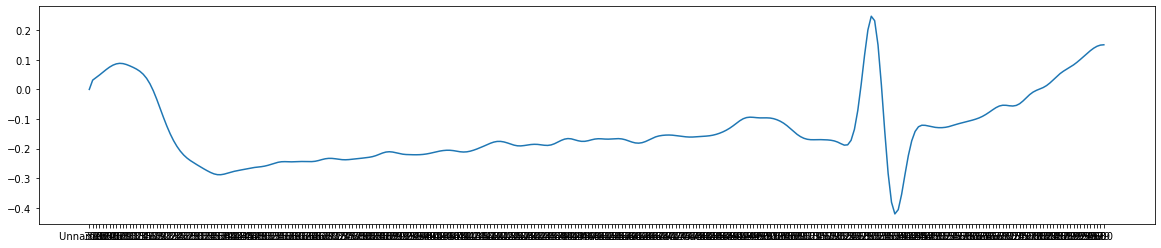

In [121]:
ECG = pd.read_csv('D:/Data/ECGDB/one_cycle/2/one_cycle_1.csv')
E = ECG.transpose()
plt.plot(E)

In [177]:
from tensorflow.keras import models, layers, optimizers, callbacks
X_train = ECG.values[:, :-1]
y_train = E.values[:,-1].astype(int)


In [178]:
X_train = np.expand_dims(X_train, 2)

print(X_train.shape)

(1, 301, 1)


In [179]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)

print(y_train.shape)

(302, 1)


In [200]:
# X_train, y_train = get_train_test()

X_train = X_train.reshape(X_train.shape[0],301,1)
# X_test = X_test.reshape(X_test.shape[0],301,1)

In [223]:
def get_model():
    model = Sequential()

    model.add(Conv1D(filters=128,kernel_size=3,activation='relu', input_shape=(301,1)))
    model.add(Conv1D(filters=64,kernel_size=3,activation='relu'))
    model.add(Conv1D(filters=32,kernel_size=3,activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=None))

    model.add(Flatten())

    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    
    return model

    
model = get_model()           
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# model.build(input_shape)
model.summary()
model.build(input_shape=(301,1))
history = model.fit(X_train, X_train, batch_size = 64, epochs = 100, verbose = 1)



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_33 (Conv1D)          (None, 299, 128)          512       
                                                                 
 conv1d_34 (Conv1D)          (None, 297, 64)           24640     
                                                                 
 conv1d_35 (Conv1D)          (None, 295, 32)           6176      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 147, 32)          0         
 g1D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 4704)              0         
                                                                 
 dense_29 (Dense)            (None, 100)               470500    
                                                      

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Test Model
predY = model.predict(X_test)
y_pred = np.argmax(predY,axis=1)
y_actual = np.argmax(y_test,axis=1)
cm = confusion_matrix(y_actual, y_pred)
print(cm)